# OpenLattice R API tutorial

This notebook shows how to use the open API documentation to interact with the OpenLattice backend, and load and join data for analysis with `R`.

Following this notebook requires a good understanding of our platform.  For more information, see our [helpsite](https://help.openlattice.com/).  Especially understanding the entity data model will be helpful.  If you find yourself stuck on what propertytypes are, and how they relate to datasets, see our description of [the EDM](https://help.openlattice.com/article/20-the-openlattice-standardized-entity-data-model).

After we've installed the python library for the OL-API, we can load the library, set the basepath and our authentication, and get the client. You can find you jwt token in the [**account page**](https://openlattice.com/gallery/#/home) of your openlattice account

In [1]:
# openlattice library
library(openlattice)
library(tidyverse)
library(httr)

# configuration
jwt = "***"
basepath = "https://api.openlattice.com"

header_params = unlist(list("Authorization" = paste("Bearer", jwt)))

client <- ApiClient$new(
  defaultHeaders = header_params,
  basePath = basepath
)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Organization of the openlattice-libraries

Our API endpoints are organized by topic.  You can find detailed information on the API-clients and the functions here: https://github.com/Lattice-Works/api-clients/tree/master/python/docs.  This is the documentation for the python clients, but the R-clients have the same object- and function-names.

 API | Description | Link to documentation 
 --- | --- | ---------------------
 AuthorizationsApi | all functions related to checking authorizations | https://github.com/Lattice-Works/api-clients/blob/master/python/docs/AuthorizationsApi.md
 DataApi | all functions related to reading data | https://github.com/Lattice-Works/api-clients/blob/master/python/docs/DataApi.md
 DataIntegrationsApi | all functions related to integrating data | https://github.com/Lattice-Works/api-clients/blob/master/python/docs/DataIntegrationsApi.md
 EdmApi | all functions related to the EDM (entity data model) | https://github.com/Lattice-Works/api-clients/blob/master/python/docs/EdmApi.md 
 EntitySetsApi | all functions related to entity sets, including creating and deleting entitysets, getting and setting metadata | https://github.com/Lattice-Works/api-clients/blob/master/python/docs/EntitySetsApi.md
 OrganizationsApi | all functions related to organizations, eg. creating organizations, adding members, dealing with access roles, materializing entitysets | https://github.com/Lattice-Works/api-clients/blob/master/python/docs/OrganizationsApi.md
 PermissionsApi | all functions related to setting permissions | https://github.com/Lattice-Works/api-clients/blob/master/python/docs/PermissionsApi.md
 PrincipalApi | all functions related to principals. | https://github.com/Lattice-Works/api-clients/blob/master/python/docs/PrincipalApi.md
 SearchApi | all functions related to searching: neighbors,... | https://github.com/Lattice-Works/api-clients/blob/master/python/docs/SearchApi.md
 
**Note**: this table is regularly updated and the table here might be incomplete.

When we load the Api-classes, we will be able to use their functions.

In [2]:
edmApi <- EdmApi$new(apiClient = client)
entitySetsApi <- EntitySetsApi$new(apiClient = client)
dataApi <- DataApi$new(apiClient = client)
searchApi <- SearchApi$new(apiClient = client)

## Browsing the openlattice platform

First, we will take a look at which datasets we have access to, with the function `edmApi.get_all_entity_sets()`.  If you click on that function in the [documentation](https://github.com/Lattice-Works/api-clients/blob/master/python/docs/EntitySetsApi.md#get_all_entity_sets), it shows which parameters should be added. In this case there are no parameters.

From this function, we get back an object of class EntitySet.  In the [documentation](https://github.com/Lattice-Works/api-clients/blob/master/python/docs/EntitySet.md), we can find a description of all properties in an entityset.
The most important properties:
- **contacts:** email address of the contact-person related to this data.
- **description:** a short description of the dataset.
- **entity_type_id:** the entitytype of the entityset.  Every dataset (entityset) is of a specific predefined type in our datamodel.  You can find more information on the entitytypes in our EDM app (https://openlattice.com/edm/), our by using the `EdmApi`-functions.
- **id:** the **unique identifier** of the entityset, which we will use throughout to handle the entityset.
- **name:** the name of the entityset, without spaces and special characters.
- **organization_id:** each entityset is part of an organization. This identifier is of the organization, which can be looked up with the `OrganizationsApi`-functions.
- **title:** the title of the entityset.  This can be more descriptive than than the name.

Below, we're pulling all the entitysets, and then filtering for those that have _Demo:_ in the title.

In [3]:
all_entity_sets = entitySetsApi$get_all_entity_sets()
demo_entity_sets = all_entity_sets %>% filter(str_detect(title, "Demo: "))

In [4]:
demo_entity_sets %>% as.tibble()

Warning message:
“`as.tibble()` is deprecated, use `as_tibble()` (but mind the new semantics).
This warning is displayed once per session.”

id,entityTypeId,name,title,description,contacts,linkedEntitySets,organizationId,flags,partitions
<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<chr>,<list>,<list>
ce0f6389-37bf-4713-b511-b5ac00660213,ecc09e28-0761-4ed0-9d9e-b1c1f883aed6,DemoLocatedAt,Demo: LocatedAt,,"kim@openlattice.com , jason@openlattice.com",,1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8,"ASSOCIATION, EXTERNAL",59
60b1188c-1031-44d0-8afe-cf8cf5ad5748,7aa9e000-0585-4dff-8512-aa35b329379a,DemoHas,Demo: Has,,"kim@openlattice.com , jason@openlattice.com",,1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8,"ASSOCIATION, EXTERNAL",110
e3bb770c-156b-4227-b1d6-daa1786740df,34aeaca4-d424-43cd-a3b4-f2032d583280,DemoSubjectOf,Demo: SubjectOf,,"kim@openlattice.com , jason@openlattice.com",,1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8,"ASSOCIATION, EXTERNAL",25
6405cd23-e95f-488d-bfe1-2c937e9adca8,5bf88cde-65bc-4865-a58b-920eec4c4028,DemoInvolvedIn,Demo: InvolvedIn,,"kim@openlattice.com , jason@openlattice.com",,1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8,"ASSOCIATION, EXTERNAL",25
c06b638f-550d-4fdf-a544-683e0afdf381,a094e89f-3b4f-4e98-9d2c-12e604ae9d6a,DemoReleasedBy,Demo: ReleasedBy,,"kim@openlattice.com , jason@openlattice.com",,1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8,"ASSOCIATION, EXTERNAL",225
782e205e-56cf-43b8-8e0f-a65992b27acb,b166054b-6cc7-41cd-8f1a-805fdfd20bbc,DemoIncomes,Demo: Incomes,Income data of patients in the OpenLattice healthcare demo data. This data is artificial and for demonstration purposes only.,"kim@openlattice.com , jason@openlattice.com",,1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8,EXTERNAL,157
dd73fb45-2bcc-4baa-8012-c81d52e2c47a,215f54f1-830e-4edb-bdc5-d4938f4a3e04,DemoVitalSigns,Demo: VitalSigns,Vital signs data taken from patients in the OpenLattice healthcare demo data. This data is artificial and for demonstration purposes only.,"kim@openlattice.com , jason@openlattice.com",,1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8,EXTERNAL,167
b1cc1398-df04-4886-ad72-13ae2360147d,c006a748-7040-4d07-b8d7-b645fa9808b3,DemoChargeEvents,Demo: ChargeEvents,Events at which charges were pressed in the OpenLattice demo data. This data is artificial and for demonstration purposes only.,jason@openlattice.com,,1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8,EXTERNAL,101
1fd760dd-d8e5-4fac-b87f-19858fa34134,22f294e5-f3f4-4317-8ff8-63528125c95f,DemoChargedWith,Demo: ChargedWith,,"kim@openlattice.com , jason@openlattice.com",,1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8,"ASSOCIATION, EXTERNAL",71


Everything in our database is identified with a Universally Unique Identifier (UUID).  We have a number of functions to query the id, to use in subsequent functions: `entitySetsApi.get_entity_set_id`, `edmApi.get_entity_type_id`, `edmApi.get_property_type_id`.  For example if we want the UUID for the dataset `DemoPatients`, we can use:

In [5]:
entity_set_id = entitySetsApi$get_entity_set_id("DemoPatients")
print(entity_set_id)

[1] "2f3afb54-f757-414c-b7c1-0b07c194edad"


If we want to know the details of one specific entity set, we could use the function `get_entity_set()`, with as argument the entityset id:

In [6]:
entitySetsApi$get_entity_set(entity_set_id)

$id
[1] "2f3afb54-f757-414c-b7c1-0b07c194edad"

$entityTypeId
[1] "31cf5595-3fe9-4d3e-a9cf-39355a4b8cab"

$name
[1] "DemoPatients"

$title
[1] "Demo: Patients"

$description
[1] "Patients logged in the OpenLattice healthcare demo data. This data is artificial and for demonstration purposes only."

$contacts
[1] "kim@openlattice.com"   "jason@openlattice.com"

$linkedEntitySets
list()

$organizationId
[1] "1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8"

$flags
[1] "EXTERNAL"

$partitions
[1] 117

#### Exercises

Here are a few questions you could answer using the OpenLattice - libraries when browsing around.  

*easy:*
- What is the entity set ID for the entity set "DemoFacilities"
- Who is the contact person for this entity set?

*moderate:* (requires looking at the documentation, can be done using 1 function)

- There is an entity type called `general.person`.  Try finding the entity type ID.
- Load the entity type.
- There are a number of properties in this entity type.  They are stored as their ID's.  Try to transform one of these ID's into the property type name.

- The entity set above belongs to the organization with ID `'1d5aa1f4-4d22-46a5-97cd-dcc6820e7ff8'`.  Which organization is this?

## Load data

Loading an entityset is very straightforward with our libraries, and we can directly load these into pandas.
For example we can load the entityset `DemoArrestees`, and read this into a pandas dataframe.

As above, we *first* want to query the entityset ID, and use this ID to load the data.

In [7]:
entity_set_id = entitySetsApi$get_entity_set_id("DemoArrestees")
print(entity_set_id)

[1] "6ca4a13d-db38-4220-ae37-b5cef76f7ccb"


**Description of data object:**
When loading the data, a list is returned with objects.  We refer to each of these objects as **entities**: a single datapoint.  The keys in the object are the property types (the column names in data-language), and the values the actual values.  There is always one additional key `openlattice.@id`, which is the entity ID or entity key ID.  We will use this later to join the tables.

**Property multiplicity:**
We make the assumption that a single person can be identified with different properties, like multiple versions of the first name, or even typo's in birthdates.  Therefore, the entities returned are lists.

In [8]:
data = dataApi$load_entity_set_data(entity_set_id)
print(data[1:5,])

     nc.PersonEthnicity      nc.SSN         nc.SubjectIdentification
1           nonhispanic 384-85-6524 e238afcb4483b37de0db905e02348765
2           nonhispanic 152-31-8226 63580bcf0c536bb485c87eaf8a77d43a
3 nonhispanic, hispanic 777-49-5252 8d4347ee6d4ce421466119a03ea01cbc
4              hispanic 252-12-2384 e1c5db6721d2d420be6f5ab333d77ec0
5           nonhispanic 034-72-6042 a5f873986cc68b7afd109ded4e3ac7bd
  nc.PersonSex nc.PersonSurName    nc.PersonGivenName nc.PersonRace
1            M         Martinez Nick, Nicholas, Claas         white
2            F            Logan                Jackie         white
3            F      Evans, Lane                   Kim         white
4            F          Fleming                 Donna         other
5            F Wallace, Carroll      Michelle, Mickey         black
      nc.PersonBirthDate                      openlattice.@id
1 1976-12-19, 1976-12-09 68b20000-0000-0000-8000-00000000fa45
2             1944-06-28 61be0000-0000-0000-8000-00000

Loading the data into a tibble dataframe can be done with one command:

In [9]:
data %>% head %>% as.tibble()

nc.PersonEthnicity,nc.SSN,nc.SubjectIdentification,nc.PersonSex,nc.PersonSurName,nc.PersonGivenName,nc.PersonRace,nc.PersonBirthDate,openlattice.@id
<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
nonhispanic,384-85-6524,e238afcb4483b37de0db905e02348765,M,Martinez,"Nick , Nicholas, Claas",white,"1976-12-19, 1976-12-09",68b20000-0000-0000-8000-00000000fa45
nonhispanic,152-31-8226,63580bcf0c536bb485c87eaf8a77d43a,F,Logan,Jackie,white,1944-06-28,61be0000-0000-0000-8000-00000000fc4e
"nonhispanic, hispanic",777-49-5252,8d4347ee6d4ce421466119a03ea01cbc,F,"Evans, Lane",Kim,white,"2006-01-25, 2006-02-25",7f1e0000-0000-0000-8000-00000000fad3
hispanic,252-12-2384,e1c5db6721d2d420be6f5ab333d77ec0,F,Fleming,Donna,other,1994-09-03,75180000-0000-0000-8000-00000000fbb1
nonhispanic,034-72-6042,a5f873986cc68b7afd109ded4e3ac7bd,F,"Wallace, Carroll","Michelle, Mickey",black,"1961-07-25, 1960-07-28",54840000-0000-0000-8000-00000000fb47
nonhispanic,716-40-3822,5ac657340a104dff41a0f4809ee58405,F,Marshall,Amber,amindian,"2015-08-19, 2015-07-19",73c40000-0000-0000-8000-00000000f9c5


#### Visualising the distribution of sex using seaborn

Dealing with the property multiplicity is challenging, since we now have multiple values for each property.  Exploding the table (i.e. expand one list into different rows) will put heavy memory-constraints on the table.  The easiest is to unnest the column of interest, **knowing that this will lead to multiple rows per subject**.  We can use the simple function below, to unnest, and then using seaborn to visualise the distribution.

In [15]:
unduplicated = data %>% 
    sapply(function(x) {x <- gsub("NULL", NA, paste(x))}) %>% 
    as_tibble()

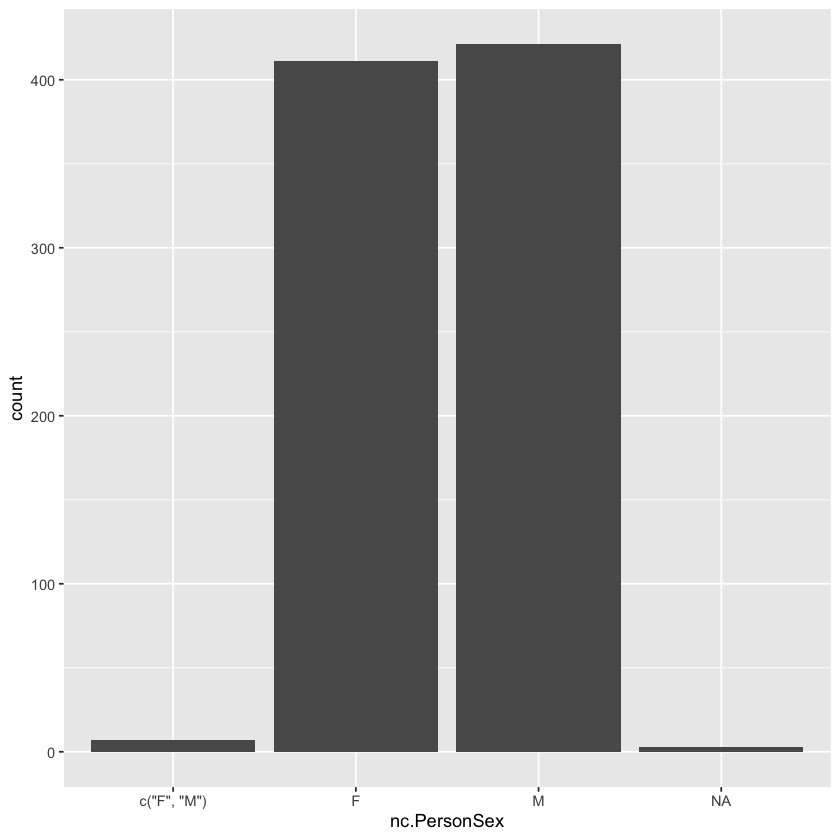

In [17]:
ggplot(unduplicated, aes(x=nc.PersonSex)) + 
    geom_bar()

#### Exercises:

*easy:*
- Load the data for the entity set `DemoPatients`.
- What is the distribution of `nc.PersonEthnicity` in this entity set?
- How many datapoints are there in this dataset?

## Join Entity Sets

We now load the entity set IDs and the data. First, we decide what data we want.  Let's say we have integrated data from a sheriff's office, supportive housing group, and detox center. We want to look at arrestees and any housing statuses they've given in the past. Use your flight diagrams to decide upon entity sets and relationships and get their names: from your OpenLattice integration, you should have a diagram of the graph data model that your data now resides in. The one for our healthcare demonstration data is [here](https://github.com/Lattice-Works/api-clients/blob/master/examples/demohealth.pdf).

We can see that **DemoPatients -> DemoLivesAt -> DemoHousings** gives us people and any housing status associated with them. 

As in the previous examples, we can load the data using the DataApi.  We can immediately read them into a pandas DataFrame.  Tables are joined through the column `openlattice.@id`, so we do the following:
- get the entity set id (`entitySetsApi.get_entity_set_id()`)
- load the data into a pandas dataframe (`dataApi.load_entity_set_data()`)
- unnest the index column `openlattice.@id` and set the index to this column.

In [18]:
sourceEntitySetId = entitySetsApi$get_entity_set_id('DemoPatients')
src_data = dataApi$load_entity_set_data(sourceEntitySetId) %>% 
    sapply(function(x) {x <- gsub("NULL", NA, paste(x))}) %>% 
    as_tibble()

associationEntitySetId = entitySetsApi$get_entity_set_id('DemoLivesAt')
edge_data = dataApi$load_entity_set_data(associationEntitySetId) %>% 
    sapply(function(x) {x <- gsub("NULL", NA, paste(x))}) %>% 
    as_tibble()

destEntitySetId = entitySetsApi$get_entity_set_id('DemoHousings')
dst_data = dataApi$load_entity_set_data(destEntitySetId) %>% 
    sapply(function(x) {x <- gsub("NULL", NA, paste(x))}) %>% 
    as_tibble()

In [20]:
head(src_data, 3)

nc.PersonEthnicity,nc.SubjectIdentification,nc.PersonSex,nc.PersonSurName,ol.datasource,nc.PersonGivenName,nc.PersonBirthDate,openlattice.@id,nc.PersonRace
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
hispanic,ffce8c91-9c62-4dd5-b640-fdb8ff815eb18,M,Hernandez-Lewis,"Opiate Treatment Program, Someplace Medical Center",Michael,1989-05-28,05b30000-0000-0000-8000-000000003358,NA
nonhispanic,4e9b0f1f-1f0a-4346-adaa-8d9475431e1c,F,Miller,"c(""Forest Outpatient Treatment"", ""State Hospital"")","c(""Kimberly"", ""Kim"")",1985-09-22,11c20000-0000-0000-8000-000000003242,asian
nonhispanic,aa453c43-cbee-455e-b9ef-0120351ba3be,M,Alvarado,State Hospital,Charles,"c(""1941-02-12"", ""1941-12-02"")",d2500000-0000-0000-8000-00000000326a,NA


In [23]:
head(dst_data, 3)

ol.id,ol.type,openlattice.@id
<chr>,<chr>,<chr>
HOMELESS,HOMELESS,d5000000-0000-0000-8000-000000003234
INDEPENDENT LIVING,INDEPENDENT LIVING,cef20000-0000-0000-8000-0000000032a9
RECENTLY INCARCERATED,RECENTLY INCARCERATED,608b0000-0000-0000-8000-0000000031d0


## Search the links between the entity sets with the API

### Full search (execute_entity_neighbor_search)

To join two entity sets (through an edge/association) we must find the unique ID that each data point, or entity, has in the three tables: the source, destination, and association. We call these IDs the neighbors.

The `execute_entity_neighbor_search`-function allows us to find all neighbors of an entity.  We can find the neighbors of the first entity in the data with the following arguments:

**note:** `src_data.index` is the index of the table: the entity_keys of this entity set)

In [32]:
all_neighbors = searchApi$execute_entity_neighbor_search(sourceEntitySetId, src_data[['openlattice.@id']][1])
# all_neighbors

In [34]:
print(all_neighbors)

                associationEntitySet.id    associationEntitySet.entityTypeId
1  60b1188c-1031-44d0-8afe-cf8cf5ad5748 7aa9e000-0585-4dff-8512-aa35b329379a
2  c7989932-934c-40fa-8c38-ee4a1e505818 bc37fd8c-3de5-49e1-80db-ad5feb37e408
3  c7989932-934c-40fa-8c38-ee4a1e505818 bc37fd8c-3de5-49e1-80db-ad5feb37e408
4  2d89894d-876e-4249-94a7-96118db2d33f f6f979d0-4eab-46e9-80db-a706dc282fa1
5  2d89894d-876e-4249-94a7-96118db2d33f f6f979d0-4eab-46e9-80db-a706dc282fa1
6  60b1188c-1031-44d0-8afe-cf8cf5ad5748 7aa9e000-0585-4dff-8512-aa35b329379a
7  c10cc4ce-a73b-4604-9f4a-077d59946c08 4f4df940-af84-48fc-ab28-990843e10349
8  668e63bc-a112-460c-8036-00fc3742ae4c 2ad709a7-da75-456f-831c-9f263ef9f510
9  c7989932-934c-40fa-8c38-ee4a1e505818 bc37fd8c-3de5-49e1-80db-ad5feb37e408
10 2d89894d-876e-4249-94a7-96118db2d33f f6f979d0-4eab-46e9-80db-a706dc282fa1
11 c7989932-934c-40fa-8c38-ee4a1e505818 bc37fd8c-3de5-49e1-80db-ad5feb37e408
12 9df1ff83-b0c2-4499-b157-78444a03b13c 3d70c2e3-6517-4ff4-ba8e-361a9774de18

In [29]:
src_data[['openlattice.@id']][1]

[1] "05b30000-0000-0000-8000-000000003358"

### Filtered search (execute_filtered_entity_neighbor_id_search)

The above approach is very handy of you're looking at 1 row, and you want to find all associated data.  However, often we are interested in joining the full table.  In order to do that, we can use the [filtered entity neighbor id search](https://github.com/Lattice-Works/api-clients/blob/master/python/docs/SearchApi.md#execute_filtered_entity_neighbor_id_search), which will return a table with keys between the two datasets.

With the filtered search, we can be more specific about the source, destination and association. To make such a query, we need to instantiate an object of type `openapi_client.NeighborSearchFilter`.  Note that we will give the source_entity_set_id in the search function, so we leave it as an empty list here in the object.

**Always set the _other_ entity set (whether source or destination) to a blank.**

In [38]:
entkeys = unlist(src_data['openlattice.@id'], use.names = FALSE)

neighbor_filter = NeighborSearchFilter$new(
  entityKeyIds = entkeys,
  edge = associationEntitySetId,
  dst = destEntitySetId
)